# Knowledge 3 - Biblioteca requests e JSON

In [ ]:
import requests
import json
import pandas as pd

# Método GET

In [ ]:
info_google = requests.get("https://www.google.com.br/") #não pode faltar o "https"

print(info_google)

## Respostas de um servidor 

<br>

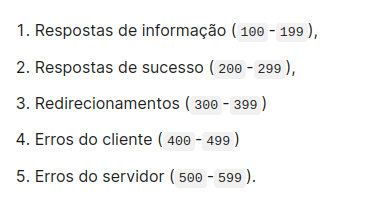


https://developer.mozilla.org/pt-BR/docs/Web/HTTP/Status

In [16]:
#print(info_google.text)
#print(info_google.json())
print(info_google.headers) #isso aqui é o cabeçalho. 

{'Date': 'Tue, 14 Feb 2023 18:39:08 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2023-02-14-18; expires=Thu, 16-Mar-2023 18:39:08 GMT; path=/; domain=.google.com.br; Secure, AEC=ARSKqsLWndR8WFhfvPzp03A2m9pHWwLXA0u90sJgctYeyedP1MTVlpeVS54; expires=Sun, 13-Aug-2023 18:39:08 GMT; path=/; domain=.google.com.br; Secure; HttpOnly; SameSite=lax, NID=511=eQYkTZNqEjOGH4_WYlOktX-rqyWoZpXex4WlzkXYYHuRdOgEOszV1yfZawDIEMFgrpzKOrzpaH7YRpjN_ExZ5zyIaGSIGk6vd5cLAXDHyzWI-qOxuRfMAaA2vtBTHHSiM6SEw4wcKl7BZ100pHie6FokhxrPaugfTzFCCypdv9g; expires=Wed, 16-Aug-2023 18:39:08 GMT; path=/; domain=.google.com.br; HttpOnly', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000', 'Transfer-Encoding': 'chunked'}


# Exemplo: Banco Central

In [17]:
codigo = 432

url_banco_central = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'

In [18]:
dados_selic = requests.get(url_banco_central)

print(dados_selic.json())

[{'data': '05/03/1999', 'valor': '45.00'}, {'data': '06/03/1999', 'valor': '45.00'}, {'data': '07/03/1999', 'valor': '45.00'}, {'data': '08/03/1999', 'valor': '45.00'}, {'data': '09/03/1999', 'valor': '45.00'}, {'data': '10/03/1999', 'valor': '45.00'}, {'data': '11/03/1999', 'valor': '45.00'}, {'data': '12/03/1999', 'valor': '45.00'}, {'data': '13/03/1999', 'valor': '45.00'}, {'data': '14/03/1999', 'valor': '45.00'}, {'data': '15/03/1999', 'valor': '45.00'}, {'data': '16/03/1999', 'valor': '45.00'}, {'data': '17/03/1999', 'valor': '45.00'}, {'data': '18/03/1999', 'valor': '45.00'}, {'data': '19/03/1999', 'valor': '45.00'}, {'data': '20/03/1999', 'valor': '45.00'}, {'data': '21/03/1999', 'valor': '45.00'}, {'data': '22/03/1999', 'valor': '45.00'}, {'data': '23/03/1999', 'valor': '45.00'}, {'data': '24/03/1999', 'valor': '45.00'}, {'data': '25/03/1999', 'valor': '42.00'}, {'data': '26/03/1999', 'valor': '42.00'}, {'data': '27/03/1999', 'valor': '42.00'}, {'data': '28/03/1999', 'valor': '

In [19]:
json_selic = dados_selic.json()

In [20]:
df = pd.DataFrame(json_selic)

df

,data,valor
0,05/03/1999,45.00
1,06/03/1999,45.00
2,07/03/1999,45.00
3,08/03/1999,45.00
4,09/03/1999,45.00
...,...,...
8779,18/03/2023,13.75
8780,19/03/2023,13.75
8781,20/03/2023,13.75
8782,21/03/2023,13.75


# Método POST

In [21]:
info_google = requests.post("https://www.google.com.br/")

print(info_google)

<Response [405]>


# Biblioteca JSON

* A única utilidade dessa biblioteca é transformar um Json em um dicionário ou um dicionário em um JSON.

In [22]:
dicionario_cotacoes = {"WEGE3": [20, 30, 40], "VALE3": [30, 45, 60]}

dicionario_cotacoes

{'WEGE3': [20, 30, 40], 'VALE3': [30, 45, 60]}

In [23]:
json_cotacoes = json.dumps(dicionario_cotacoes)

json_cotacoes

'{"WEGE3": [20, 30, 40], "VALE3": [30, 45, 60]}'

In [24]:
dicionario_cotacoes_pos_json = json.loads(json_cotacoes)

dicionario_cotacoes_pos_json

{'WEGE3': [20, 30, 40], 'VALE3': [30, 45, 60]}

# Exercícios

* Exercício 133: Faça uma requisição GET pra API do banco central e extraia dados de inflação, sabendo que o código do IPCA é 433. Com o resultado da requisição, crie um dataframe.
* Exercício 134: Faça uma requisição POST para a API do banco central e dê um print nas response.

In [26]:
#gabarito 133

codigo = 433

url_banco_central = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'

dados_ipca = requests.get(url_banco_central)

json_ipca = dados_ipca.json()

df_ipca = pd.DataFrame(json_ipca)

df_ipca

,data,valor
0,01/01/1980,6.62
1,01/02/1980,4.62
2,01/03/1980,6.04
3,01/04/1980,5.29
4,01/05/1980,5.70
...,...,...
512,01/09/2022,-0.29
513,01/10/2022,0.59
514,01/11/2022,0.41
515,01/12/2022,0.62


In [27]:
#gabarito 134

codigo = 433

url_banco_central = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'

response = requests.post(url_banco_central)

print(response)

<Response [404]>
